In [1]:
#data wrangling
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#preprocessing and machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("files/Mall_Customers.csv")

### __Exploration__

__Our dataset contains information on customers' age, gender, annual income and spending scores.__

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


__There are 200 observation__

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


__There is no missing value__

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.index=np.arange(1,len(df)+1)
df.drop(columns="CustomerID",inplace=True)

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


__The mean of the customers age is 38, the minimum age is 18, and the maximum age is 70__

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


__The mean of the annual income is 60.56, the minimum annual income is 15, and the maximum annual income is 137__

In [15]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

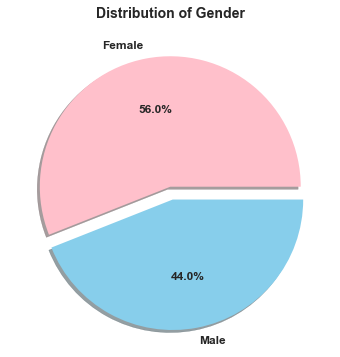

In [16]:
data=df.Gender.value_counts()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data,autopct="%.1f%%",labels=data.keys(),explode = (0, 0.1),
        colors = ['pink', 'skyblue'],shadow=True,textprops=dict(fontweight="bold",fontsize=12));
plt.title("Distribution of Gender",dict(fontweight="bold",fontsize=14));

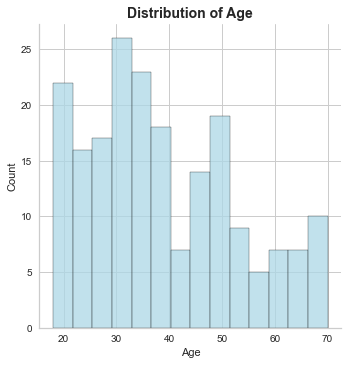

In [17]:
sns.displot(data=df,x="Age",color="lightblue",bins=14);
plt.title("Distribution of Age",dict(fontweight="bold",fontsize=14));

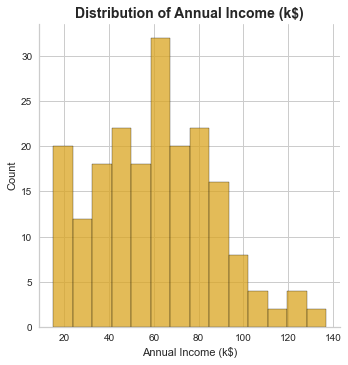

In [18]:
sns.displot(data=df,x="Annual Income (k$)",color="goldenrod",bins=14);
plt.title("Distribution of Annual Income (k$)",dict(fontweight="bold",fontsize=14));

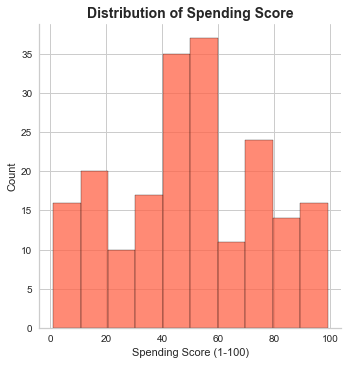

In [19]:
sns.displot(data=df,x="Spending Score (1-100)",color="tomato",bins=10);
plt.title("Distribution of Spending Score",dict(fontweight="bold",fontsize=14));

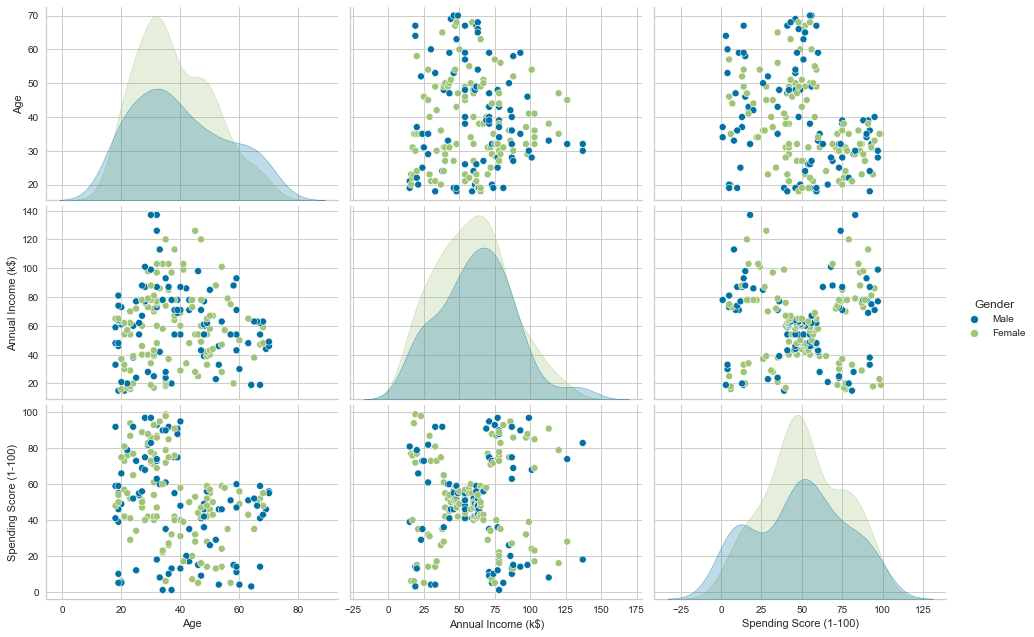

In [20]:
sns.pairplot(data=df,hue="Gender",height=3,aspect=1.5);

### __Label Encoding__

In [21]:
lbe=LabelEncoder()

In [22]:
df["Gender"] = lbe.fit_transform(df["Gender"])

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


### __Modelling__

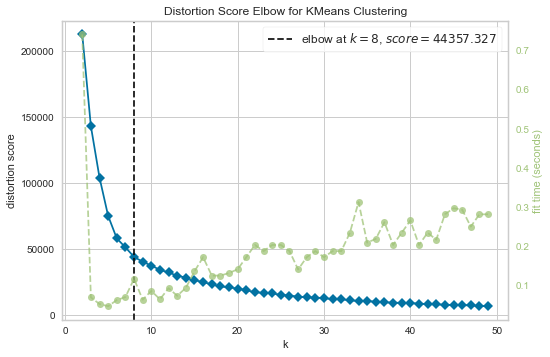

In [24]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df); 
visualizer.poof();

__Although the algorithm suggest us the number 8 as the number of clusters, I will prefer the number 5. Because I think that 8 too much for customer segmentation__

In [25]:
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [26]:
df["group"] = kumeler +1

In [27]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),group
1,1,19,15,39,4
2,1,21,15,81,5
3,0,20,16,6,4
4,0,23,16,77,5
5,0,31,17,40,4


### __Visualization__

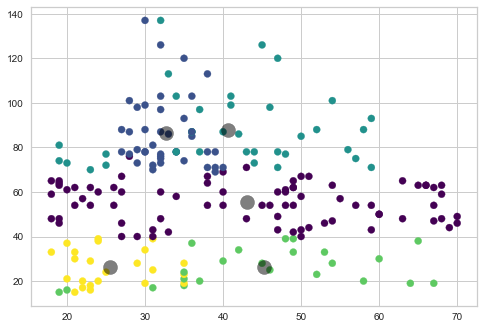

In [28]:
plt.scatter(df.iloc[:,1], df.iloc[:,2], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,1], merkezler[:,2], c = "black", s = 200, alpha = 0.5);

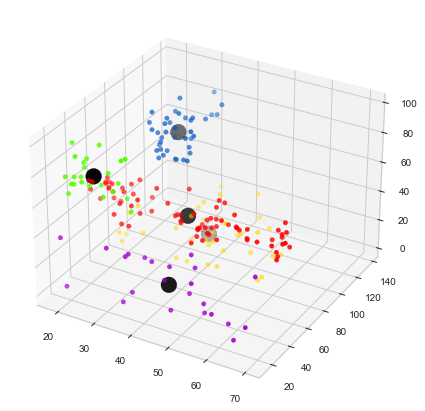

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], c=kumeler,cmap="prism")
ax.scatter(merkezler[:, 1], merkezler[:, 2], merkezler[:, 3], 
           marker='.', 
           c='#050505', 
           s=1000);

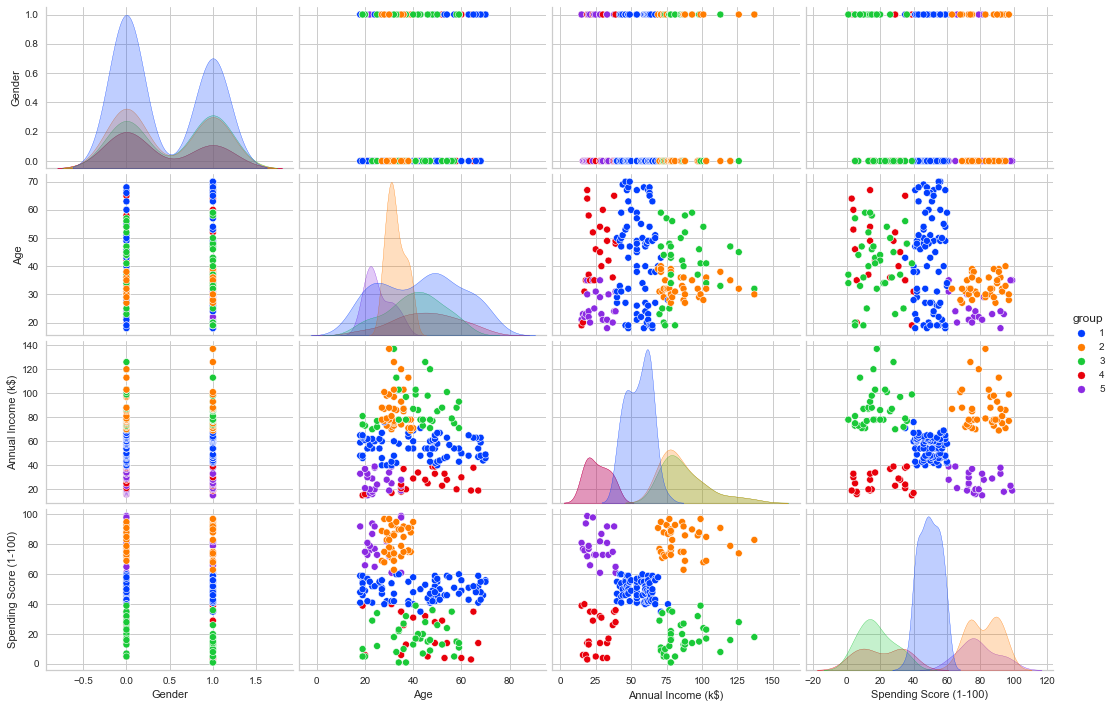

In [30]:
sns.pairplot(df,hue="group",aspect=1.5,palette="bright");